In [1]:
import tensorflow as tf
import numpy as np
import os
import pandas as pd
from tqdm import tqdm
from alexnet import alexnet
WIDTH=80
HEIGHT=80
EPOCHS=30
LR=1e-3
MODEL_NAME='FYP17-{}{}.model'.format(LR,'FYPV9')
print('done')

curses is not supported on this machine (please install/reinstall curses for an optimal experience)
done


In [2]:
model=alexnet(WIDTH,HEIGHT,LR)

In [3]:
hm_data = 10
for i in range(EPOCHS):
    for i in range(1,hm_data+1):
        train_data = np.load('training_data_v1.npy')

        train = train_data[:-100]
        test = train_data[-100:]

        X = np.array([i[0] for i in train]).reshape(-1,WIDTH,HEIGHT,1)
        Y = [i[2] for i in train]

        test_x = np.array([i[0] for i in test]).reshape(-1,WIDTH,HEIGHT,1)
        test_y = [i[2] for i in test]

        model.fit({'input': X}, {'targets': Y}, n_epoch=1, validation_set=({'input': test_x}, {'targets': test_y}), 
            snapshot_step=10000, show_metric=True, run_id=MODEL_NAME)
        
        #tensorboard --logdir=foo:C:/Tensorboard_logs/FYP17/log

        model.save(MODEL_NAME)

Training Step: 3920  | total loss: 12.36155 | time: 12.285s
| Adam | epoch: 013 | loss: 12.36155 - acc: 0.1600 -- iter: 17408/19437


KeyboardInterrupt: 

In [11]:
if os.path.exists('{}.meta'.format(MODEL_NAME)):
    model.load(MODEL_NAME)
    print('model loaded!')

model loaded!


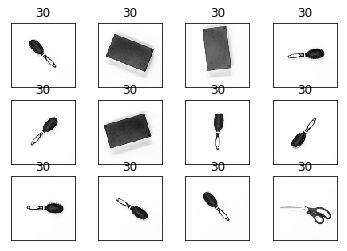

In [9]:
import matplotlib.pyplot as plt
IMG_SIZE=WIDTH
# if you already have some saved:
test_data = np.load('training_data_v1.npy')

fig=plt.figure()

for num,data in enumerate(test_data[700:712]):
    # cat: [1,0]
    # dog: [0,1]
    
    img_num = data[2]
    img_data = data[0]
    
    y = fig.add_subplot(3,4,num+1)
    orig = img_data
    data = img_data.reshape(IMG_SIZE,IMG_SIZE,1)
    model_out = model.predict([data])[0]
    str_label=np.argmax(model_out)*30
        
    y.imshow(orig,cmap='gray')
    plt.title(str_label)
    y.axes.get_xaxis().set_visible(False)
    y.axes.get_yaxis().set_visible(False)
plt.show()

In [10]:
model.predict([data])[0]

[3.3211341933948174e-14,
 0.45998480916023254,
 0.11547987163066864,
 1.5372801658825764e-24,
 1.917814527891438e-18,
 0.4245353043079376]

In [8]:
np.argmax([1,0])

0

In [21]:
X[0]

array([[[254],
        [254],
        [254],
        ..., 
        [254],
        [254],
        [254]],

       [[254],
        [254],
        [254],
        ..., 
        [254],
        [253],
        [253]],

       [[254],
        [254],
        [254],
        ..., 
        [253],
        [253],
        [253]],

       ..., 
       [[254],
        [254],
        [253],
        ..., 
        [252],
        [252],
        [252]],

       [[253],
        [253],
        [253],
        ..., 
        [252],
        [252],
        [252]],

       [[253],
        [253],
        [253],
        ..., 
        [252],
        [252],
        [252]]], dtype=uint8)